#  1. Tabu Search

## 1.1 Theory
Tabu search is a memory based searching algorithm proposed by Fred Grover in 1986. It's basic principle is to pursue local search whenever it encounters a local optimum by allowing non-improving moves. The algorithm keeps a record of recent moves or visited solution made in the past, this record is maintained in a list called tabu list which prevents cylcing back to already visited moves or solution's. the search is so forced to explore new moves which are not in the list. however this feature can be overriden when some aspiration criteria is satidifed.

## 1.2 Idea

*   The search will begin with an initial solution s0, we can generate the solution randomly or by applying any nearest neighbouring algorithm.
*   Generate the neighbouring the solution from the initail solution.
*   Calculate the cost of each neighbourhood solution
*   Add all visited solution to tabu list, leads to visting unvisited or new solutions.
*   New solution will be created until the number of iteration are met.

### let us consider the following notations : -

I => the number of iterations 

S => Size of the neighbourhood

L => Lenght of tabu list

### Steps : -

Step 1  : set I , S , L.

Step 2  : Choose a random solution s0.

Step 3  : push the random generated solution in the tabu list .

Step 4  : Create a neighbourhood solutions from the initial solution s0.

Step 5  : Go through each of the generated solution in neighbourhood and evaluate the cost.

Step 6  : Pick the best solution s1.

Step 8  : Check if its in tabu list.

Step 9  : If solution is alredy in tabu list get the next solution s1 = s1+1.

Step 10 : If solution is not in tabu list it will become our current solution.

Step 11 : Check if tabu list is full.

Step 12 : Add the current solution to the tabu list,if tabu list is full drop the oldest solution first.

Step 13 : Make the current solution as intial solution s0 = s1.

Step 14 : Have we complete all the iterations (I) ?

Step 15 : If no, repeat steps 4 - 14. if yes return the best solution and its cost.  



## High-level pseudocode.


1.    $sBest \gets s0 $ (intitial solution) 

2.    $sBestCandidate \gets s0 $ 

3.    $bestcost \gets  calculate cost of $sBestCandidate$

4.    $ tabulist \gets [] \$

5.    $ maxtabusize \gets set ~ tabu ~ list ~ size \$

6.    $ tabulist.push \gets s0 \$

7.    $ I \gets set ~ number~ of ~iterations \$

8.    **while** 0 < $ I (stopping ~ criterion ) $ **do**

9.    $ ~ ~ ~ ~ sNeighborhood \gets get ~ all ~ neighbours(sBestCandidate) \$

10.    $ ~ ~ ~ ~ sBestCandidate \gets sNeighborhood[I] \$

11.    $ ~ ~ ~ ~ $**for**  all  solution  in  sNeighborhood  **do** 

12.    $ ~ ~ ~ ~ ~ ~ ~ solutioncost \gets calculate ~ cost~ of ~solution \$

13.   $ ~ ~ ~ ~ ~ ~ ~ $**if** solution not in tabu list and $ solutioncost $ >  $bestcost$

14.   $ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ sBestCandidate \gets solution \$

15.   $ ~ ~ ~ ~ ~ ~ ~ $**end if** 

16.   $ ~ ~ ~ ~ $**end for**

17.   $ ~ ~ ~ ~ $ **if** $ ~ bestcost ~ $  >  cost of initial solution

18.   $ ~ ~ ~ ~ ~ ~ ~ sBest\gets sBestCandidate \$

19.   $ ~ ~ ~ ~ $**end if** 

20.   $ tabulist.push \gets sBestCandidate \$

21.   **if** tabu list size  >  $ ~ maxtabusize ~ $

22.   $ ~ ~ ~ ~ $ Remove first from list

23.   **end if** 

24.   **return** $sBest$ , $bestcost$

## Big-O analysis of the given pseudocode.

The first while-loop which genrates all the neighbouring solutions,costs $O(n)$, and the second for loop will loop through each of the solution will cost $O(n)$ as well. Inserting and checking in tabu list will be costing $O(1)$.
So the total cost of this solution would be $~O(n^2)$.

## Provided Code for Generating Graphs

In [ ]:
from random import randint, shuffle # random integers and random shuffling of a list
from itertools import permutations # iterate over all possible permutations of a list
from itertools import chain # concatenate range()'s'
from math import inf as oo # Infinity (∞) is larger than any number
from math import sqrt, log, factorial  # square root, logarithm, and n!
from time import perf_counter # for measuring time. NB. 'perf_counter' is better/more accurate than 'time'
import networkx as nx # to draw sample graphs
import pandas as pd # to show the adjacency matrix in a nice format
import matplotlib.pyplot as plt # to plot graphs of time and quality vs n
import seaborn as sns # nice statistical plots -- see e.g. https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial
import argparse
import copy
import os
sns.set_style("white")

In [ ]:
class Graph:
    ''' Random graphs '''
    def __init__(self, n=0, type='asymmetric', MAX_WEIGHT=100, MAX_X=200, MAX_Y=200):
        self.n = n
        self.vertices = list(range(n)) # [0,1,...,n-1]
        self.type = type
        self.adj_matrix = [[oo for i in range(n)] for j in range(n)]
        #print(self.adj_matrix)
        # Generate a random adjacency matrix according to the required type
        if   type=='symmetric': self.__random_symmetric_graph(n,MAX_WEIGHT)
        elif type=='Euclidean': self.__random_euclidean_graph(n,MAX_X,MAX_Y)
        elif type=='easy':      self.__random_cycle_graph(n)
        else:                   self.__random_asymmetric_graph(n,MAX_WEIGHT) # assume 'asymmetric' otherwise
            
    def __getitem__(self, i):
        ''' Allow indexing to get the weights '''
        return self.adj_matrix[i]
                
    def __random_asymmetric_graph(self,n, MAX_WEIGHT):
        ''' Asymmetric adjacency matrix of size nxn '''
        for i in range(n):
            for j in range(n):
                if i==j: continue # no self-loops
                self.adj_matrix[i][j] = randint(1,MAX_WEIGHT)

    def __random_symmetric_graph(self,n,MAX_WEIGHT):
        ''' Symmetric adjacency matrix of size nxn '''
        for i in range(n):
            for j in range(i+1,n):
                w = randint(1,MAX_WEIGHT)
                self.adj_matrix[i][j] = w
                self.adj_matrix[j][i] = w

    def __random_cycle_graph(self,n):
        ''' Symmetric adjacency matrix of size nxn with one reandomly chosen cycle
        All the edge weights are 2 except for the cycle (weight=1) '''
        self.adj_matrix = [[2 for _ in range(n)] for _ in range(n)] # All weights=2
        # Select a random cycle which will have weight=1
        cycle = list(range(1,n)) # don't include 0 as we want to be at the start
        shuffle(cycle) # in-place random permutation
        cycle = [0]+cycle+[0] # cycle starting and ending at 0
        for a,b in zip(cycle, cycle[1:]): # set the cycle's weights to 1
            self.adj_matrix[a][b] = 1
            self.adj_matrix[b][a] = 1

    def __random_euclidean_graph(self,n,MAX_X,MAX_Y):
        ''' Symmetric adjacency matrix of a Euclidean graph of size nxn '''
        # (1/2) Generate random (x,y) points
        points = set()
        while len(points)<n: # We may get duplicate (x,y) so we try until we get enough points
            x,y = randint(0,MAX_X), randint(0,MAX_Y)
            points.add((x,y))
        points = list(points) # Sets are not indexed, so convert into a list
        # (2/2) Now compute the adjacency matrix
        for i in range(n):
            p1 = points[i]
            for j in range(i+1,n):
                p2 = points[j]
                distance = sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
                self.adj_matrix[i][j] = distance
                self.adj_matrix[j][i] = distance
        self.points=points

In [ ]:
def show(G):
    ''' Show adjacency matrix. Useful for debugging.
    'type' is a string from: Euclidean, Cycle, ...
    The distances are round to 1 decimal point for clarity/simplicity
    '''
    print(f"{G.n}x{G.n} {G.type} graph:")
    if G.type=='Euclidean': print("Points:",G.points)
    r = pd.DataFrame({str(i): G[i] for i in range(G.n)})
    display(r)
    
def nx_graph(G):
    ''' Convert G into NetworkX format '''
    nxG = nx.Graph() if G.type!='asymmetric' else nx.DiGraph() # undirected/directed graph
    nxG.add_nodes_from(G.vertices) # Add the vertices
    # Now add the edges
    for a in G.vertices:
        for b in G.vertices:
            if a==b: continue # no self-loops
            nxG.add_edge(a, b, weight=G[a][b])        
    if G.type=='Euclidean': # add (x,y) coordinates if available
        pos=dict(enumerate(G.points)) # vertex:(x,y) pairs
        nx.set_node_attributes(nxG, pos, 'coord')
    return nxG

def draw(G):
    ''' Draw the graph G using NetworkX '''
    nxG = nx_graph(G)
    weights_dictionary = nx.get_edge_attributes(nxG,'weight')
    edges,weights = zip(*weights_dictionary.items())
    pos = nx.circular_layout(nxG) if G.type!='Euclidean' else nx.get_node_attributes(nxG,'coord')
    nx.draw(nxG, pos, \
            with_labels=True, node_color='red', font_color='white', font_weight='bold', font_size=14,\
            edge_color=weights, width=1.5, connectionstyle="arc3,rad=0.1", edge_cmap=plt.cm.copper)
    # see https://matplotlib.org/stable/gallery/color/colormap_reference.html
    nx.draw_networkx_edge_labels(nxG, pos, edge_labels=weights_dictionary, label_pos=0.5 if G.type!="asymmetric" else 0.25)

## Helper functions for tabu search

In [ ]:
def ConvertDataToTabu(G):
  nodes = (len(G.adj_matrix)-1)
  dictionary_of_nodes = {}
  for i in range(len(G.adj_matrix)):
    outerlist = []
    for j in range(nodes):
      innerlist = []
      outerlist.append(innerlist)
    dictionary_of_nodes[str(i)] = outerlist
  for i in range(len(G.adj_matrix)):
    for j in range(len(G.adj_matrix[i])):
      del G.adj_matrix[i][i]
      break
  for i in range(len(G.adj_matrix)):
    for j in range(len(G.adj_matrix[i])):
      dictionary_of_nodes[str(i)][j].append(str(j))
      dictionary_of_nodes[str(i)][j].append(str(G.adj_matrix[i][j]))
  for i in dictionary_of_nodes:
    aheadincrease = False
    for j in range(len(dictionary_of_nodes[i])):
      if aheadincrease == True:
        # value = int(dictionary_of_nodes[str(i)][str(j)][0])
        dictionary_of_nodes[str(i)][j][0]   =  str(int( dictionary_of_nodes[str(i)][j][0])+ 1)
        continue
      if dictionary_of_nodes[str(i)][j][0] == str(i):
        aheadincrease = True
        dictionary_of_nodes[str(i)][j][0]  = str(int(dictionary_of_nodes[str(i)][j][0])+ 1)
        # dictionary_of_nodes[i][j][0] += 1
  return dictionary_of_nodes

In [ ]:
def WriteDataTofile(dictionary_of_nodes):
  if os.path.exists("/content/sample_data/new_tabu_data.txt"):
    os.remove("/content/sample_data/new_tabu_data.txt")
  with open('/content/sample_data/new_tabu_data.txt', 'w') as writefile:
    for i in dictionary_of_nodes:
      for j in range(len(dictionary_of_nodes[i])):
        line = str(i) + " " + str(dictionary_of_nodes[i][j][0]) + " " + str(dictionary_of_nodes[i][j][1]) + "\n"
        writefile.write(line)
  return '/content/sample_data/new_tabu_data.txt'

In [ ]:
def generate_first_solution(path, dict_of_neighbours):
    """
    Pure implementation of generating the first solution for the Tabu search to start,
    with the redundant resolution strategy. That means that we start from the starting
    node (e.g. node 'a'), then we go to the city nearest (lowest distance) to this node
    (let's assume is node 'c'), then we go to the nearest city of the node 'c', etc.
    till we have visited all cities and return to the starting node.
    :param path: The path to the .txt file that includes the graph (e.g.tabudata2.txt)
    :param dict_of_neighbours: Dictionary with key each node and value a list of lists
        with the neighbors of the node and the cost (distance) for each neighbor.
    :return first_solution: The solution for the first iteration of Tabu search using
        the redundant resolution strategy in a list.
    :return distance_of_first_solution: The total distance that Travelling Salesman
        will travel, if he follows the path in first_solution.
    """

    with open(path) as f:
        start_node = f.read(1)
    end_node = start_node

    first_solution = []

    visiting = start_node

    distance_of_first_solution = 0
    while visiting not in first_solution:
        minim = 10000
        for k in dict_of_neighbours[visiting]:
            if int(k[1]) < int(minim) and k[0] not in first_solution:
                minim = k[1]
                best_node = k[0]

        first_solution.append(visiting)
        distance_of_first_solution = distance_of_first_solution + int(minim)
        visiting = best_node

    first_solution.append(end_node)

    position = 0
    for k in dict_of_neighbours[first_solution[-2]]:
        if k[0] == start_node:
            break
        position += 1

    distance_of_first_solution = (distance_of_first_solution+ int(dict_of_neighbours[first_solution[-2]][position][1])- 10000
    )
    return first_solution, distance_of_first_solution

## Tabu search code


In [ ]:
def find_neighborhood(solution, dict_of_neighbours):
    """
    Pure implementation of generating the neighborhood (sorted by total distance of
    each solution from lowest to highest) of a solution with 1-1 exchange method, that
    means we exchange each node in a solution with each other node and generating a
    number of solution named neighborhood.
    :param solution: The solution in which we want to find the neighborhood.
    :param dict_of_neighbours: Dictionary with key each node and value a list of lists
        with the neighbors of the node and the cost (distance) for each neighbor.
    :return neighborhood_of_solution: A list that includes the solutions and the total
        distance of each solution (in form of list) that are produced with 1-1 exchange
        from the solution that the method took as an input
    Example:
    >>> find_neighborhood(['a', 'c', 'b', 'd', 'e', 'a'],
    ...                   {'a': [['b', '20'], ['c', '18'], ['d', '22'], ['e', '26']],
    ...                    'c': [['a', '18'], ['b', '10'], ['d', '23'], ['e', '24']],
    ...                    'b': [['a', '20'], ['c', '10'], ['d', '11'], ['e', '12']],
    ...                    'e': [['a', '26'], ['b', '12'], ['c', '24'], ['d', '40']],
    ...                    'd': [['a', '22'], ['b', '11'], ['c', '23'], ['e', '40']]}
    ...                   )  # doctest: +NORMALIZE_WHITESPACE
    [['a', 'e', 'b', 'd', 'c', 'a', 90],
     ['a', 'c', 'd', 'b', 'e', 'a', 90],
     ['a', 'd', 'b', 'c', 'e', 'a', 93],
     ['a', 'c', 'b', 'e', 'd', 'a', 102],
     ['a', 'c', 'e', 'd', 'b', 'a', 113],
     ['a', 'b', 'c', 'd', 'e', 'a', 119]]
    """

    neighborhood_of_solution = []

    for n in solution[1:-1]:
        idx1 = solution.index(n)
        for kn in solution[1:-1]:
            idx2 = solution.index(kn)
            if n == kn:
                continue

            _tmp = copy.deepcopy(solution)
            _tmp[idx1] = kn
            _tmp[idx2] = n

            distance = 0

            for k in _tmp[:-1]:
                next_node = _tmp[_tmp.index(k) + 1]
                for i in dict_of_neighbours[k]:
                    if i[0] == next_node:
                        distance = distance + int(i[1])
            _tmp.append(distance)

            if _tmp not in neighborhood_of_solution:
                neighborhood_of_solution.append(_tmp)

    indexOfLastItemInTheList = len(neighborhood_of_solution[0]) - 1

    neighborhood_of_solution.sort(key=lambda x: x[indexOfLastItemInTheList])
    return neighborhood_of_solution

In [ ]:
def tabu_search(
    first_solution, distance_of_first_solution, dict_of_neighbours, iters, size
):
    """
    Pure implementation of Tabu search algorithm for a Travelling Salesman Problem in
    Python.
    :param first_solution: The solution for the first iteration of Tabu search using
        the redundant resolution strategy in a list.
    :param distance_of_first_solution: The total distance that Travelling Salesman will
        travel, if he follows the path in first_solution.
    :param dict_of_neighbours: Dictionary with key each node and value a list of lists
        with the neighbors of the node and the cost (distance) for each neighbor.
    :param iters: The number of iterations that Tabu search will execute.
    :param size: The size of Tabu List.
    :return best_solution_ever: The solution with the lowest distance that occurred
        during the execution of Tabu search.
    :return best_cost: The total distance that Travelling Salesman will travel, if he
        follows the path in best_solution ever.
    """
    count = 1
    solution = first_solution
    tabu_list = list()
    best_cost = distance_of_first_solution
    best_solution_ever = solution 

    while count <= iters:
        neighborhood = find_neighborhood(solution, dict_of_neighbours)
        index_of_best_solution = 0
        best_solution = neighborhood[index_of_best_solution]
        best_cost_index = len(best_solution) - 1

        found = False
        while not found:
            i = 0
            while i < len(best_solution):

                if best_solution[i] != solution[i]:
                    first_exchange_node = best_solution[i]
                    second_exchange_node = solution[i]
                    break
                i = i + 1

            if [first_exchange_node, second_exchange_node] not in tabu_list and [
                second_exchange_node,
                first_exchange_node,
            ] not in tabu_list:
                tabu_list.append([first_exchange_node, second_exchange_node])
                found = True
                solution = best_solution[:-1]
                cost = neighborhood[index_of_best_solution][best_cost_index]
                if cost < best_cost:
                    best_cost = cost
                    best_solution_ever = solution
            else:
                index_of_best_solution = index_of_best_solution + 1
                best_solution = neighborhood[index_of_best_solution]

        if len(tabu_list) >= size:
            tabu_list.pop(0)

        count = count + 1

    return best_solution_ever, best_cost

In [ ]:
def tabu_search_final(G):

  dictionary_of_nodes = ConvertDataToTabu(G)
  FilePath = WriteDataTofile(dictionary_of_nodes)

  Iterations  = 5
  Size = len(dictionary_of_nodes)

  first_solution , distance_of_first_solution = generate_first_solution( FilePath , dictionary_of_nodes )

  best_sol, best_cost = tabu_search( first_solution, distance_of_first_solution, dictionary_of_nodes, Iterations, Size,)

  # print(best_sol,best_cost)

## Testing tabu search time cost

### Tabu search on cyclic graphs from 5 to 107 cities

In [ ]:
MAX_REPETITIONS = 10
MAX_n = 20

tabu_search_data = pd.DataFrame(columns=['n', 'time'])

i=0
for n in range(5,MAX_n):
    print(n, end=', ')
    for repetitions in range(MAX_REPETITIONS):
        G = Graph(n,'easy')
        # Time the search
        t0 = perf_counter()
        tabu_search_final(G)
        t1 = perf_counter()
        # Record the data
        tabu_search_data.loc[i] = [n, t1-t0]
        i += 1

5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 

In [ ]:
tabu_search_data.groupby('n').agg(['min','max','mean','std'])

time                              
           min       max      mean       std
n                                           
5.0   0.000968  0.002328  0.001177  0.000420
6.0   0.001666  0.003395  0.002185  0.000663
7.0   0.002591  0.005043  0.002960  0.000763
8.0   0.003958  0.005462  0.004249  0.000483
9.0   0.005806  0.011145  0.006792  0.001703
10.0  0.008305  0.012162  0.009075  0.001212
11.0  0.011599  0.016337  0.012853  0.001511
12.0  0.015485  0.018422  0.016239  0.001086
13.0  0.020268  0.022958  0.021314  0.000863
14.0  0.026202  0.033621  0.028071  0.002496
15.0  0.034007  0.042415  0.035414  0.002525
16.0  0.042732  0.048486  0.045187  0.002052
17.0  0.052898  0.060294  0.055057  0.002284
18.0  0.064944  0.073986  0.067428  0.002636
19.0  0.078611  0.086077  0.081711  0.002697

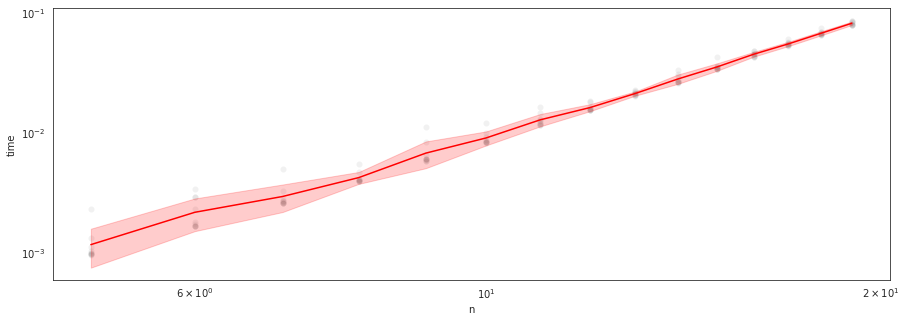

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=tabu_search_data, x='n', y='time', alpha=0.1, color='#777') # actual data
sns.lineplot(data=tabu_search_data, x='n', y='time', ci='sd', color='red') # mean
plt.xscale('log')
plt.yscale('log')

In [ ]:
tabu_search_data['time/n!'] = tabu_search_data['time']/tabu_search_data['n'].transform(factorial)
tabu_search_data.groupby('n').mean()

,time,time/n!
n,,
5.0,0.001177,9.804474e-06
6.0,0.002185,3.035264e-06
7.0,0.002960,5.872420e-07
8.0,0.004249,1.053886e-07
9.0,0.006792,1.871813e-08
10.0,0.009075,2.500833e-09
11.0,0.012853,3.219915e-10
12.0,0.016239,3.390270e-11
13.0,0.021314,3.422792e-12


In [ ]:
exhaustive_constant = tabu_search_data[tabu_search_data.n == MAX_n-1]['time/n!'].mean() # use the largest n available
exhaustive_constant

6.717168042578448e-19

In [ ]:
def time_in_human_units(t):
    if t<60: return f'{t} seconds'
    t /= 60 # now in minutes
    if t<60: return f'{t} minutes'
    t /= 60 # now in hours
    if t<24: return f'{t} hours'
    t /= 24 # now in days
    if t<30: return f'{t} days'
    t /= 30 # now in months
    if t<12: return f'{t} months'
    t = t*30/365.25 # now in years
    if t<100: return f'{t} years'
    return f'{t/100} centuries'

for n in chain(range(10,50), range(30,101,10)):
    estimated_running_time = exhaustive_constant*factorial(n) # O(n!))
    print(n,time_in_human_units(estimated_running_time)) # constant_min is used

10 2.4375259392908675e-12 seconds
11 2.681278533219954e-11 seconds
12 3.217534239863945e-10 seconds
13 4.182794511823128e-09 seconds
14 5.8559123165523795e-08 seconds
15 8.783868474828569e-07 seconds
16 1.405418955972571e-05 seconds
17 0.0002389212225153371 seconds
18 0.004300582005276068 seconds
19 0.08171105810024529 seconds
20 1.6342211620049056 seconds
21 34.31864440210302 seconds
22 12.583502947437774 minutes
23 4.8236761298511475 hours
24 4.823676129851147 days
25 4.019730108209289 months
26 8.584228567839139 years
27 2.3177417133165674 centuries
28 64.89676797286388 centuries
29 1882.0062712130527 centuries
30 56460.18813639158 centuries
31 1750265.832228139 centuries
32 56008506.63130045 centuries
33 1848280718.8329148 centuries
34 62841544440.319115 centuries
35 2199454055411.169 centuries
36 79180345994802.1 centuries
37 2929672801807677.0 centuries
38 1.1132756646869173e+17 centuries
39 4.341775092278977e+18 centuries
40 1.7367100369115903e+20 centuries
41 7.120511151337523e